# Tutorial 2. Discriminar amplitudes de forma simple y cómo obtener derivadas de los datos.
### Noel Isaías Plascencia-Díaz, Erin C. McKiernan, Marco Arieli Herrera-Valdez,
### Facultad de Ciencias, UNAM



In [1]:
# muestra las gráficas
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import scipy as sc
from __future__ import division, print_function
import numpy as np
import wave
import pandas as pd
import seaborn as sns

## Tabla de contenidos
[1. Introducción](#introduccion)

[1.1 Extraer datos en formato .wav](#extract_wav)

[1.2 Extraer características del muestreo](#extract_info)

[2. Derivadas del voltaje](#derive)

[3. Un filtro de amplitudes simple](#amp_filter)

<a id='introduction'></a>
### Introducción (¡más formatos!)
Los datos obtenidos en el laboratiorio no siempre están codificados en formatos que se puedan analizar como números (por ejemplo.txt,.xls,.csv). En este caso, analizaremos un par electromiogramas (EMG) , los cuales fueron obtenidos colocando electrodos en el brazo de un voluntario, a quien se le pidió que levantara un peso mientras se realizó el registro.

Estos archivos están en formato .wav, por lo que es necesario abrirlos a traves de la librería $\textit{wave}$ para poderlos manipular:

In [4]:
record1 = wave.open('Dec0.wav', 'r') 

<a id='extract_wav'></a>
La librería $\textit{wave}$ nos permite obtener los datos de la onda de la siguiente forma:

In [5]:
frames = record1.readframes(-1) #toma todos los frames de "audio", es decir, todos los puntos que corresponden a una amplitud en el registro

Es posible ver que *frames* tiene un formato de tipo *string*, es decir, interpretado como texto. Para que Python pueda interpretarlo como números, necesitamos hacer lo siguiente:

In [6]:
waveData = np.fromstring(frames, 'Int16')  #fromstring toma la variable "frames" y convierte sus elementos al tipo de variable 'Int16'
                                           #es decir, números enteros

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


<a id='extract_info'></a>
Un último paso antes de analizar los datos, es saber el número de canales de registro y la frecuencia de muestreo del mismo para tener una escala de tiempo adecuada:

In [7]:
numChannels = record1.getnchannels() #número de canales
sampleRate = record1.getframerate()  #frecuencia de muestreo
sampleWidth = record1.getsampwidth()
numFrames = record1.getnframes() 

print('There is %d channel.' % (numChannels))
print('The sampling rate is %d Hz.' % (sampleRate))

There is 1 channel.
The sampling rate is 44100 Hz.


In [8]:
# Obtiene la escala de tiempo 
tiempo = np.arange(0,len(waveData))/(sampleRate)

¡Ahora podemos graficar los datos!, puedes consultar un tutorial acerca de matplotlib en el siguiente link: http://mple.m-artwork.eu/tutorial

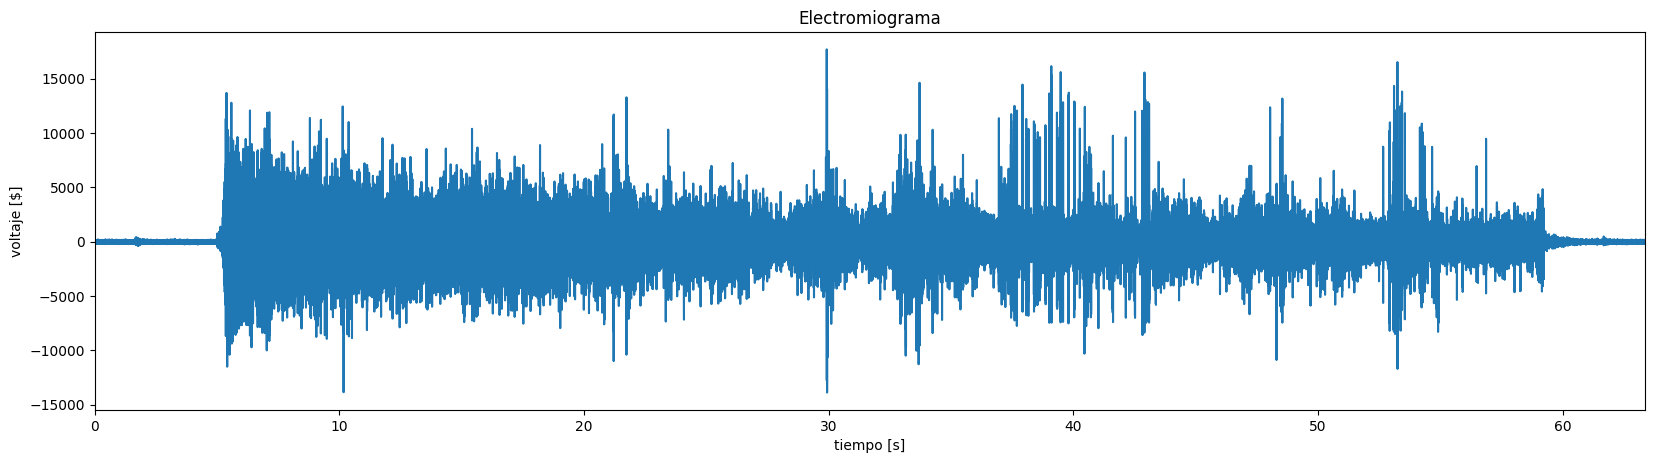

In [10]:
# Plot EMG signal
fig = plt.figure(figsize=(20, 5), dpi=100)
plt.figure(1)

plt.title('Electromiograma')
plt.xlabel(r'tiempo [s]')
plt.ylabel(r'voltaje [$]')

plt.plot(tiempo,waveData)

plt.xlim(0,max(tiempo))
plt.show()

<a id='derive'></a>
### Derivadas del voltaje
Una forma de detectar cambios de interés en el comportamiento en los datos es calcular las derivadas discretas entre puntos sucesivos del registro. Para nuestro caso, la derivada del voltaje con respecto al tiempo es un indicador de la rapidéz con la que cambia la actividad muscular a lo largo del registro.

In [9]:
def derive_signal(x,dt):
    
    l1 = len(x)-1
    der_s = [-((x[i] - x[i+1])/dt) for i in range(0,l1)]
    return der_s

In [10]:
derivada_voltaje = derive_signal(waveData,1/sampleRate);

In [11]:
fig = plt.figure(figsize=(20, 5), dpi=100)
plt.figure(1)
plt.title('Electromiograma')
plt.xlabel(r'tiempo [s]')
plt.ylabel(r'$\frac{dV}{dt}$ [$\frac{$\mu$V}{s}$]')

plt.plot(derivada_voltaje)
#plt.xlim(0,max(tiempo))
plt.show()

<a id='amp_filter'></a>
### Discriminar amplitudes
Es posible discriminar los datos considerando solamente las amplitudes que nos interesa estudiar. En el caso de los EMGs, las amplitudes que corresponden a potenciales de acción son se encuetran en el rango de  $ 10^{2} \mu V$. Una forma de extraer amplitudes en este rango para nuestro registro es utilizar la paquetería $\textit{Pandas}$, que sirve para tabular y acceder a datos de forma rápida y práctica.

Para hacer lo anterior, primero es necesario colocar los datos en forma de $\textit{dataframe}$:

In [12]:
df = pd.DataFrame({'Tiempo':tiempo,'Amplitud':waveData}) 
df;

Ahora podemos seleccionar las amplitudes que nos interesan y graficarlas:

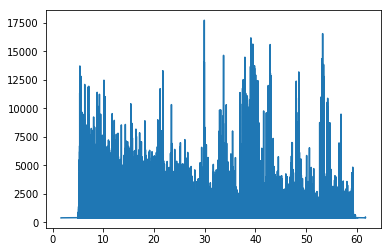

In [13]:
filtered = df[(df["Amplitud"]>400)] #selecciona amplitudes mayores a 400 microvolts
plt.plot(filtered['Tiempo'],filtered['Amplitud'])

Las funciones presentadas en este tutorial pueden servir  (entre otras cosas) como herramientas para preprocesar los datos y extraer sólamemte los fenómenos de interés. En el siguiente tutorial analizarenos la forma en la que fluctúan estos mismos datos para extraer información acerca del comportamiento global de la serie de tiempo.